### Feature Matching Tests ###

In [ ]:
# Ref: https://docs.opencv.org/4.5.2/dc/dc3/tutorial_py_matcher.html

In [1]:
import numpy as np
import cv2

In [3]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

#### ORB + Brute Force Matching ####

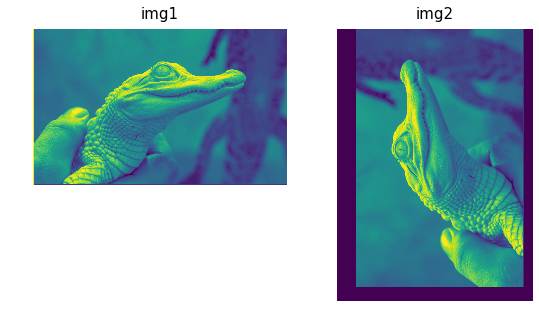

In [43]:
img1 = cv2.imread('img1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.png', cv2.IMREAD_GRAYSCALE)

OpCV_Utils.show_multiple_imgs_plt([[img1, img2]], [['img1', 'img2']], fig_size = (10,5))

In [44]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

396


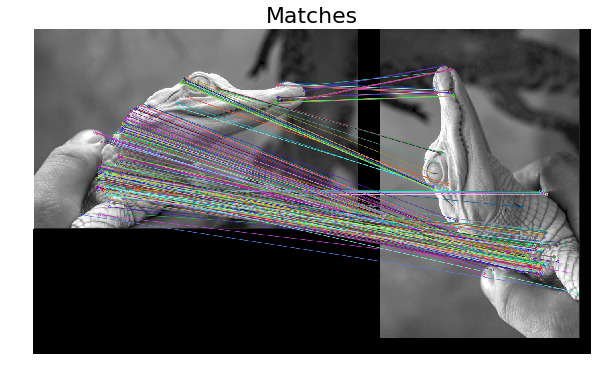

In [45]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))

# Draw first 10 matches.
result_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Result:
OpCV_Utils.show_single_img_plt(result_img, 'Matches', fig_size = (10,10))

#### SIFT + Brute Force Matching

In [46]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [47]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

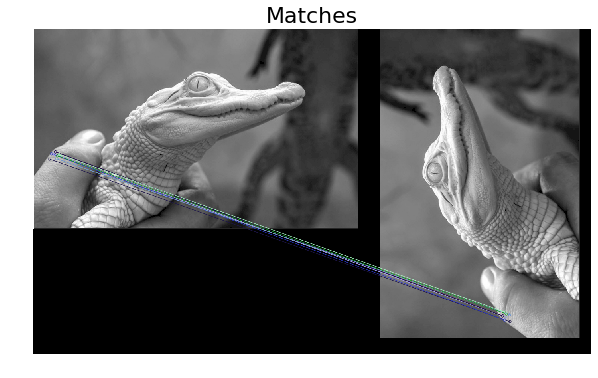

In [50]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
result_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[10:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Result:
OpCV_Utils.show_single_img_plt(result_img, 'Matches', fig_size = (10,10))

#### FLANN 

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets.

In [70]:
def flann_matching(img1, img2, matching_type='orb'):
    
    if (matching_type=='sift'):
        
        # Initiate SIFT detector
        sift = cv2.SIFT_create()
        # find the keypoints and descriptors with SIFT
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(img2, None)
    
        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=50)   # or pass empty dictionary
        
    if (matching_type=='orb'):
        
        # Initiate ORB detector
        orb = cv2.ORB_create()
        # find the keypoints and descriptors with ORB
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)
        
        FLANN_INDEX_LSH = 6
        index_params= dict(algorithm = FLANN_INDEX_LSH,
        table_number = 6, # 12
        key_size = 12,     # 20
        multi_probe_level = 1) #2
        search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)

    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]

    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = cv2.DrawMatchesFlags_DEFAULT)

    result_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

    # Result:
    OpCV_Utils.show_single_img_plt(result_img, 'Matches', fig_size = (10,10))
    

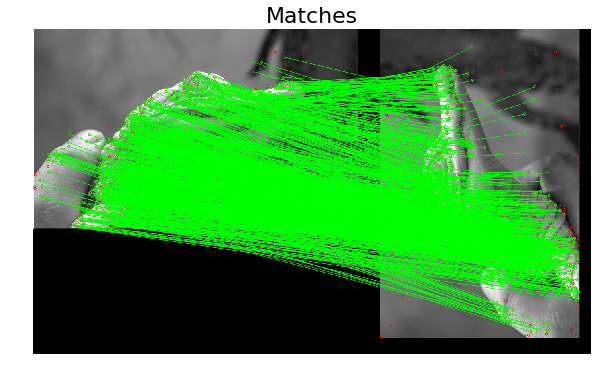

In [71]:
flann_matching(img1, img2, matching_type='sift')

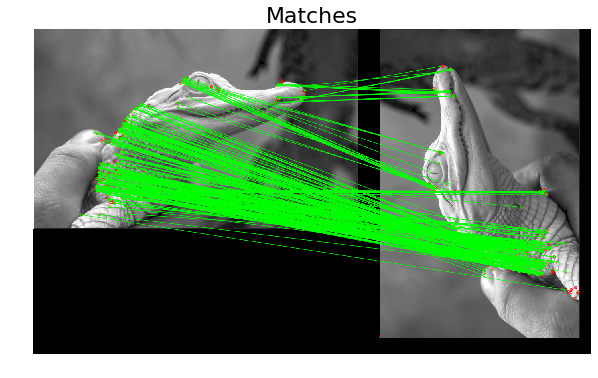

In [67]:
flann_matching(img1, img2, matching_type='orb')